### Package Installation ###

In [3]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached matplotlib-3.5.3-cp310-cp310-win_amd64.whl (7.2 MB)
     ---------------------------------------- 38.6/38.6 MB 1.2 MB/s eta 0:00:00
  Using cached Pillow-9.2.0-cp310-cp310-win_amd64.whl (3.3 MB)
  Using cached kiwisolver-1.4.4-cp310-cp310-win_amd64.whl (55 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     -------------------------------------- 957.2/957.2 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing Packages ###

In [2]:
import psycopg2
import pandas as pd
import psycopg2.extras
import seaborn as sns
import numpy as np

In [3]:
import matplotlib.pyplot as plt

### Connection to DB ###

In [4]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "mudabbir",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("Connection to DB established!")
        return self.connection

In [5]:
con = PostgresConnection().getConnection()

Connection to DB established!


In [6]:
cur = con.cursor()

# Query #

## Q1: Find the division/district/year/month wise total_sale_price joining fact table and respective dimension table ##

### Q1.1: Find the division wise total_sale_price joining fact table and respective dimension table ###

In [117]:
con = PostgresConnection().getConnection()
insert_stmt = """SELECT s.division, SUM(f.total_price) as Total_Sales 
FROM ecomdb_star_schema.fact_table as f
INNER JOIN ecomdb_star_schema.store_dim as s ON s.store_key = f.store_key 
GROUP BY CUBE(s.division)
ORDER BY Total_Sales"""
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(insert_stmt)
records = cur.fetchall()
total_sales_by_division_df = pd.DataFrame(list(records), columns=['Division', 'Total Sales'])
total_sales_by_division_df

Connection to DB established!


,Division,Total Sales
0,SYLHET,5512234.25
1,BARISAL,7520343.75
2,RANGPUR,8429836.50
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,CHITTAGONG,19763595.00
6,DHAKA,40764619.75
7,None,105401435.75


In [118]:
total_sales_by_division_df=total_sales_by_division_df.dropna()
total_sales_by_division_df

,Division,Total Sales
0,SYLHET,5512234.25
1,BARISAL,7520343.75
2,RANGPUR,8429836.50
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,CHITTAGONG,19763595.00
6,DHAKA,40764619.75


In [121]:
changetype(total_sales_by_division_df)

In [119]:
total_sales_by_division_df=total_sales_by_division_df.set_index(['Division'])


<AxesSubplot:ylabel='Total Sales'>

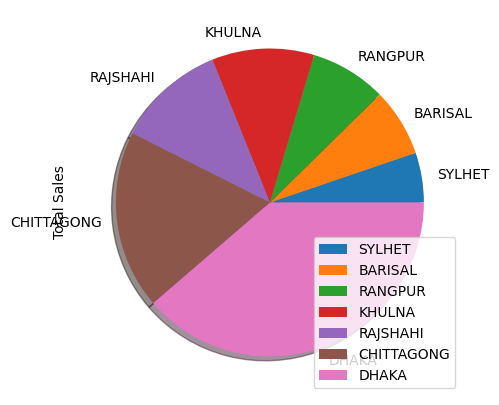

In [122]:
total_sales_by_division_df.plot.pie(y='Total Sales', figsize=(5,5),shadow='True')

### Q1.2: Find the district wise total_sale_price joining fact table and respective dimension table ###

In [124]:
con = PostgresConnection().getConnection()
insert_stmt = """SELECT s.district , SUM(f.total_price) as total_sales
FROM ecomdb_star_schema.fact_table as f
JOIN ecomdb_star_schema.store_dim as s ON s.store_key = f.store_key 
GROUP BY CUBE(s.district) 
ORDER BY total_sales"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(insert_stmt)
records = cur.fetchall()
total_sales_by_district_df = pd.DataFrame(list(records), columns=['District', 'Total Sales'])
total_sales_by_district_df

Connection to DB established!


,District,Total Sales
0,MEHERPUR,436755.00
1,NARAIL,440698.75
2,CHUADANGA,563909.75
3,JHALOKATI,570807.25
4,MAGURA,577543.25
...,...,...
60,RAJSHAHI,3756454.50
61,KHULNA,4081283.75
62,CHITTAGONG,7292985.50
63,DHAKA,23597621.00


In [125]:
total_sales_by_district_df=total_sales_by_district_df.dropna()
changetype(total_sales_by_district_df)

C:\Users\Acer\AppData\Local\Temp\ipykernel_16192\3166812033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Total Sales']=a['Total Sales'].astype('float64')


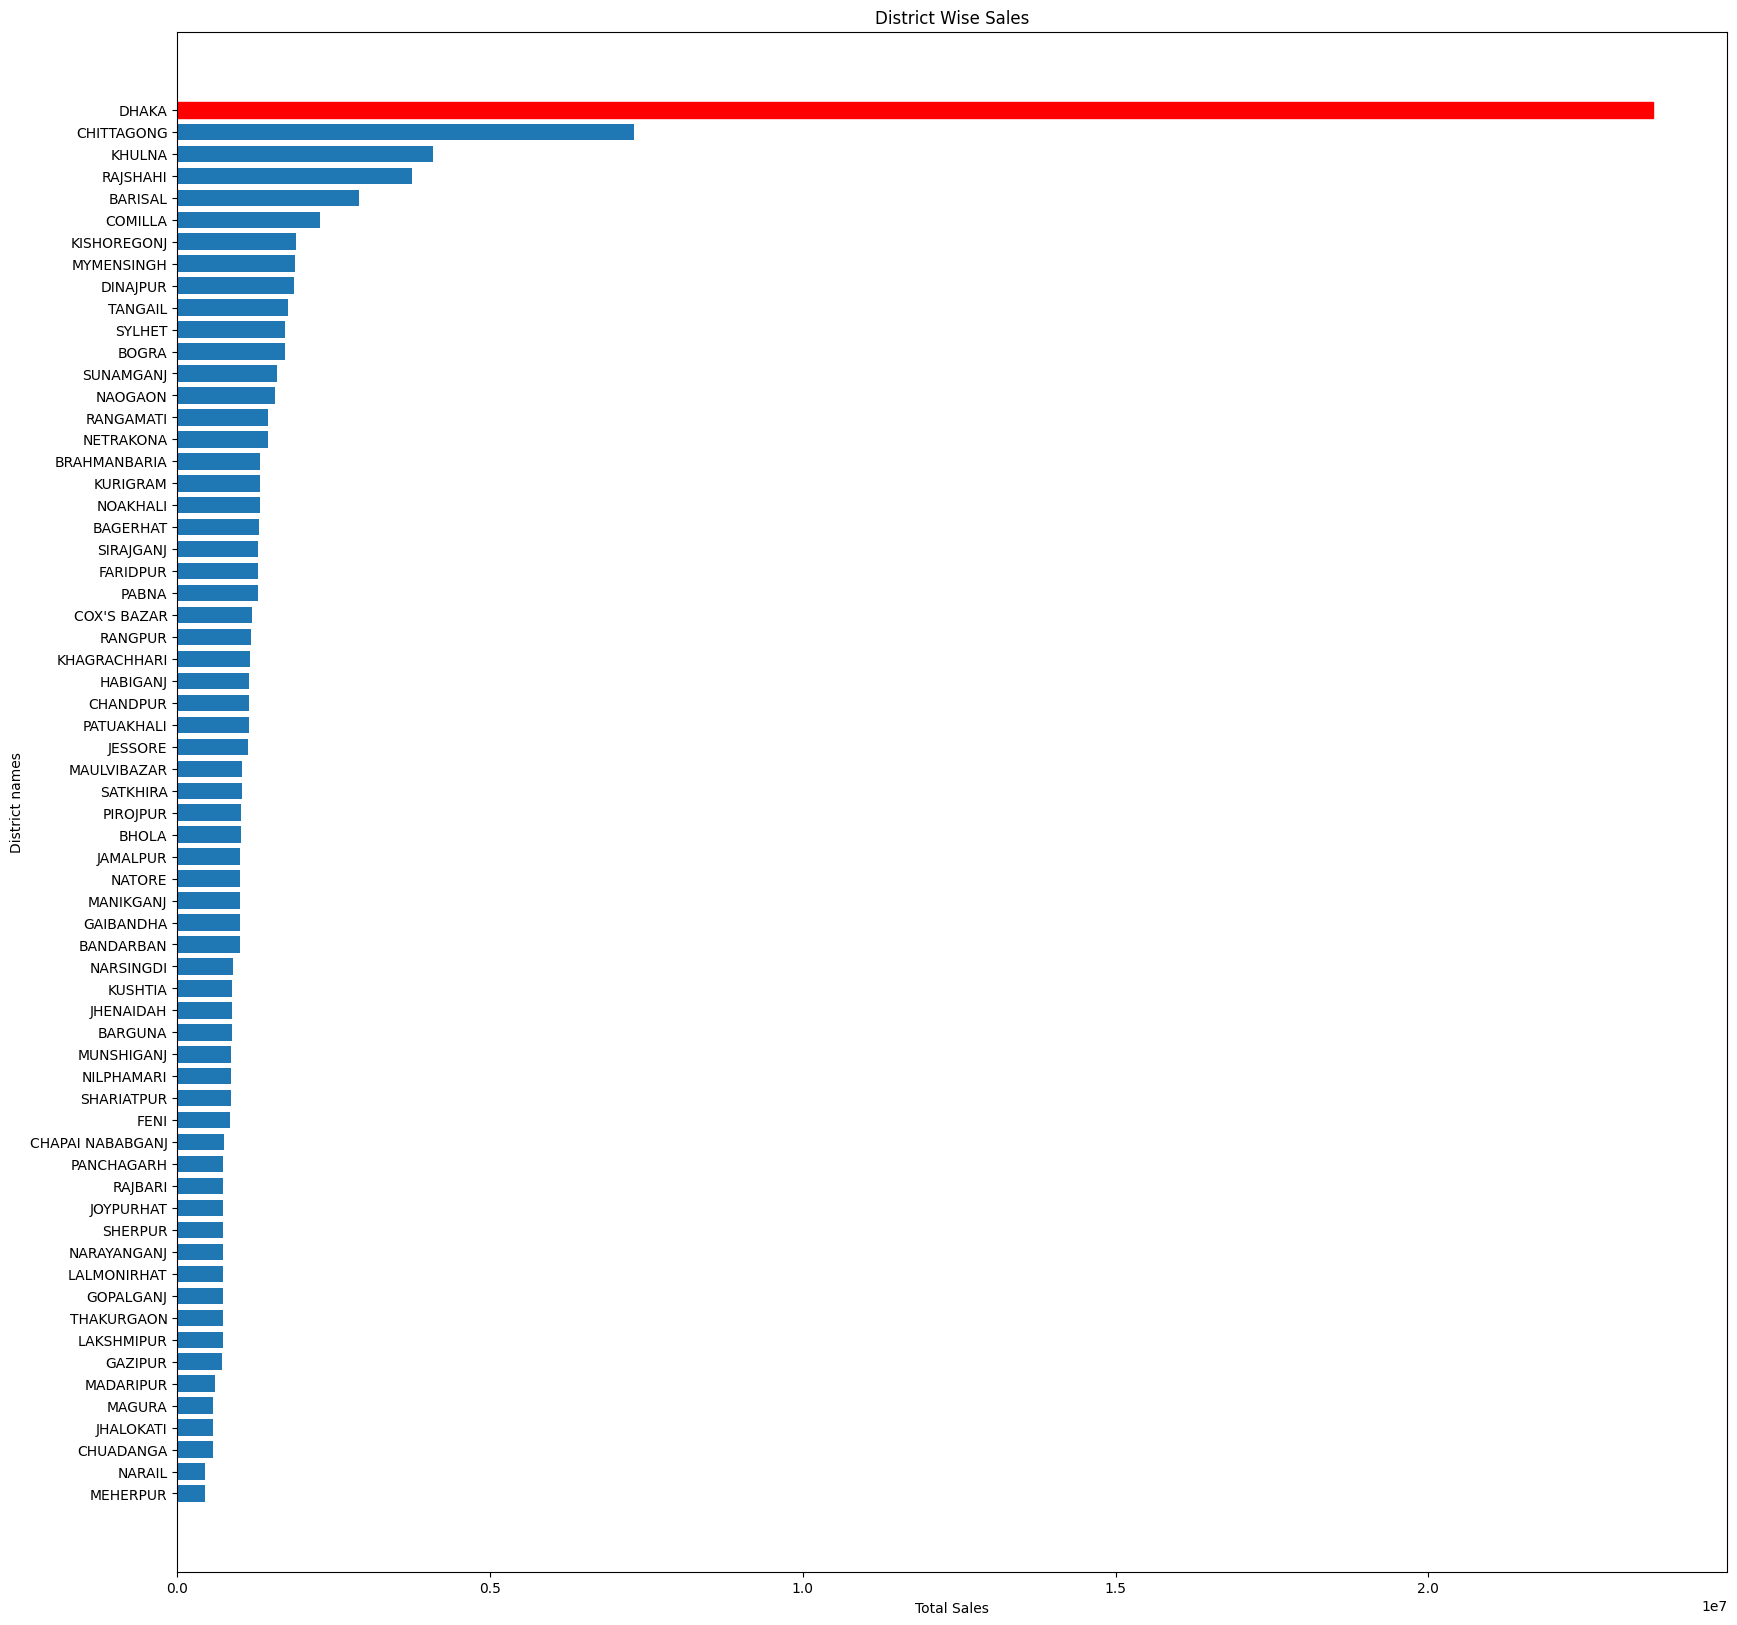

In [136]:
plt.figure(figsize = (20, 20))
barlist=plt.barh(total_sales_by_district_df['District'],total_sales_by_district_df['Total Sales'], height=00.75)
barlist[-1].set_color('r')
plt.title('District Wise Sales')
plt.xlabel('Total Sales')
plt.ylabel('District names') 
plt.show()

### Q1.3: Find the year wise total_sale_price joining fact table and respective dimension table ###

In [145]:
con = PostgresConnection().getConnection()
insert_stmt = """SELECT t.year , SUM(f.total_price) as Total_Sales 
FROM ecomdb_star_schema.fact_table as f
JOIN ecomdb_star_schema.time_dim as t ON t.time_key = f.time_key 
GROUP BY t.year 
ORDER BY Total_Sales"""
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(insert_stmt)
records = cur.fetchall()
year_wise_sales_df = pd.DataFrame(list(records), columns=['Year', 'Sales'])
year_wise_sales_df

Connection to DB established!


,Year,Sales
0,2021,883772.25
1,2014,14334731.25
2,2019,14949510.25
3,2016,14976508.25
4,2017,15015806.00
5,2020,15037190.25
6,2015,15095720.25
7,2018,15108197.25


   Year      Sales
0  2021  883772.25


<AxesSubplot:title={'center':'Year Wise Sales'}, xlabel='Year', ylabel='Sales'>

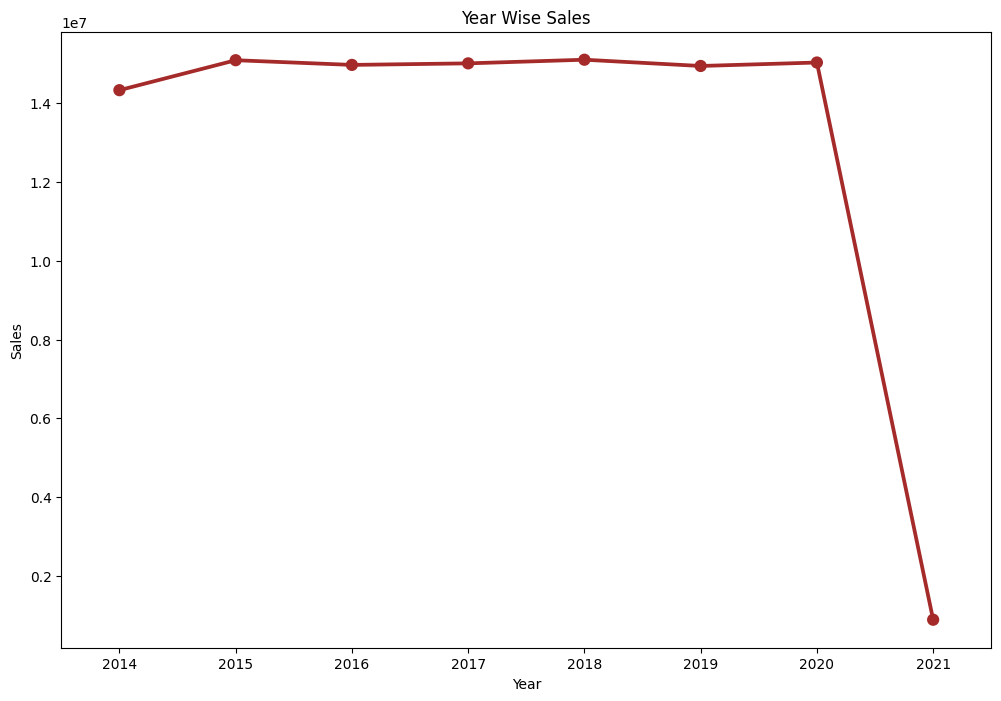

In [146]:
plt.figure(figsize = (12, 8))
plt.title('Year Wise Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
t=year_wise_sales_df.loc[year_wise_sales_df['Year']==2021]
print(t)
sns.pointplot(data=year_wise_sales_df,x='Year',y='Sales',color='brown')

### Q1.4: Find the month wise total_sale_price joining fact table and respective dimension table ###

In [154]:
con = PostgresConnection().getConnection()
insert_stmt = """SELECT t.month , SUM(f.total_price) as Total_Sales
FROM ecomdb_star_schema.fact_table as f 
JOIN ecomdb_star_schema.time_dim as t ON t.time_key = f.time_key 
GROUP BY CUBE(t.month)
ORDER BY Total_Sales""" 
cur = con.cursor()
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(insert_stmt)
records = cur.fetchall()
month_wise_sales_df = pd.DataFrame(list(records), columns=['Month', 'Total Sales'])
month_wise_sales_df

Connection to DB established!


,Month,Total Sales
0,2.0,8073877.50
1,4.0,8504634.75
2,6.0,8556853.00
3,11.0,8680026.00
4,9.0,8724326.50
5,10.0,8902783.75
6,12.0,8923480.50
7,8.0,8929475.25
8,3.0,8939152.00
9,1.0,9042244.00


In [155]:
month_wise_sales_df=month_wise_sales_df.dropna()

In [156]:
changetype(month_wise_sales_df)

C:\Users\Acer\AppData\Local\Temp\ipykernel_16192\3166812033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Total Sales']=a['Total Sales'].astype('float64')


<AxesSubplot:xlabel='Month'>

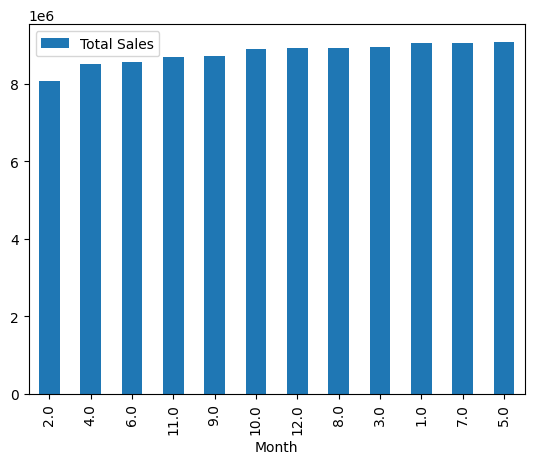

In [157]:
month_wise_sales_df.plot(x ='Month', y='Total Sales', kind = 'bar')

Q2: Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table 

### Q2.1: Find the customer wise total_sale_price joining fact table and respective dimension table ###

In [165]:
con = PostgresConnection().getConnection()
cur = con.cursor()
insert_stmts = "SELECT customer_dim.name, SUM(fact_table.total_price) " \
              "FROM ecomdb_star_schema.fact_table " \
              "JOIN ecomdb_star_schema.customer_dim on customer_dim.customer_key=fact_table.customer_key " \
                "JOIN ecomdb_star_schema.trans_dim on trans_dim.payment_key=fact_table.payment_key " \
                "GROUP BY CUBE (customer_dim.name) " \
                "ORDER BY SUM(fact_table.total_price)"
cur.execute(insert_stmts)
records_customer = cur.fetchall()
customer_df = pd.DataFrame(list(records_customer), columns=['Name', 'Sales'])
customer_df

Connection to DB established!


,Name,Sales
0,purva,7081.75
1,bahwana,7105.50
2,meenaxi,7113.50
3,smt sujata,7496.25
4,ahsamin @ juhi,7554.25
...,...,...
4533,sunita,915543.75
4534,neha,996121.00
4535,jyoti,1331696.25
4536,pooja,2109800.75


### Q2.2: Find the bank wise total_sale_price joining fact table and respective dimension table ###

In [163]:
con = PostgresConnection().getConnection()
cur = con.cursor()
insert_stmts = "SELECT trans_dim.bank_name, SUM(fact_table.total_price) " \
              "FROM ecomdb_star_schema.fact_table " \
              "JOIN ecomdb_star_schema.customer_dim on customer_dim.customer_key=fact_table.customer_key " \
                "JOIN ecomdb_star_schema.trans_dim on trans_dim.payment_key=fact_table.payment_key " \
                "GROUP BY CUBE (trans_dim.bank_name) " \
                "ORDER BY trans_dim.bank_name"
cur.execute(insert_stmts)
records_bank = cur.fetchall()
bank_df = pd.DataFrame(list(records_bank), columns=['Bank name', 'Sales'])
bank_df

Connection to DB established!


,Bank name,Sales
0,AB Bank Limited,2728515.50
1,Bangladesh Commerce Bank Limited,2730999.25
2,Bank Asia Limited,2687142.75
3,Bengal Commercial Bank Ltd,2704554.25
4,Bkash,2689352.50
5,BRAC Bank Limited,2705795.75
6,Citizens Bank Limited,2723215.25
7,City Bank Limited,2713952.50
8,Community Bank Bangladesh Limited,2685751.50
9,Dhaka Bank Limited,2728366.00


### Q2.3: Find the transaction wise total_sale_price joining fact table and respective dimension table ###

In [6]:
con = PostgresConnection().getConnection()
cur = con.cursor()
insert_stmts = "SELECT trans_dim.trans_type, SUM(fact_table.total_price) " \
              "FROM ecomdb_star_schema.fact_table " \
              "JOIN ecomdb_star_schema.customer_dim on customer_dim.customer_key=fact_table.customer_key " \
                "JOIN ecomdb_star_schema.trans_dim on trans_dim.payment_key=fact_table.payment_key " \
                "GROUP BY CUBE (trans_dim.trans_type) " \
                "ORDER BY trans_dim.trans_type"
cur.execute(insert_stmts)
records_type = cur.fetchall()
type_df = pd.DataFrame(list(records_type), columns=['Type', 'Sales'])
type_df

Connection to DB established!


,Type,Sales
0,card,94583038.50
1,cash,2708515.75
2,mobile,8109881.50
3,None,105401435.75


### Q3: Total sales in Barisal ###

In [34]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.district, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key " \
                "WHERE s.district='BARISAL' "\
                "GROUP BY CUBE(s.district) "\
                "ORDER BY s.district"
cur.execute(select_stmt)
records_barisal = cur.fetchall()
records_barisal
barisal_df = pd.DataFrame(list(records_barisal), columns=['Barisal', 'Sales'])
barisal_df

Connection to DB established!


,Barisal,Sales
0,BARISAL,2897237.75
1,None,2897237.75


### Q4: Total sales in 2015 ###

In [42]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT tim.year, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
                "JOIN ecomdb_star_schema.time_dim tim on tim.time_key=t.time_key " \
                "WHERE tim.year=2015  "\
                "GROUP BY CUBE(tim.year) "\
                "ORDER BY tim.year"
cur.execute(select_stmt)
records = cur.fetchall()
y2015_df = pd.DataFrame(list(records), columns=['Year', 'Sales'])
y2015_df

Connection to DB established!


,Year,Sales
0,2015.0,15095720.25
1,NaN,15095720.25


### Q5: Total sales of Barisal in 2015 ###

In [47]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT t.year, s.district, SUM(f.total_price) as total_sale_price " \
"FROM ecomdb_star_schema.fact_table as f "\
"JOIN ecomdb_star_schema.time_dim as t ON t.time_key = f.time_key " \
"JOIN ecomdb_star_schema.store_dim as s ON s.store_key = f.store_key "\
"WHERE t.year = 2015 and s.district = 'BARISAL' "\
"GROUP BY CUBE(t.year, s.district)"
cur.execute(select_stmt)
records = cur.fetchall()
barisal_2015_df = pd.DataFrame(list(records), columns=['Year', 'District', 'Sales'])
barisal_2015_df

Connection to DB established!


,Year,District,Sales
0,2015.0,BARISAL,415748.75
1,2015.0,None,415748.75
2,NaN,None,415748.75
3,NaN,BARISAL,415748.75


### Q6: For each store(item supplier), what are the top three products offered that are most often purchased?
S1-> item1 -> quantity_sales

S1-> item2 -> quantity_sales

S1-> item3 -> quantity_sales

In [52]:
con = PostgresConnection().getConnection()
curr = con.cursor()
select_stmts = "SELECT s.store_key , i.item_name, sum(f.quantity) as quantity_sales_for_each_item " \
"FROM ecomdb_star_schema.fact_table as f "\
"JOIN ecomdb_star_schema.store_dim as s ON s.store_key = f.store_key " \
"JOIN ecomdb_star_schema.item_dim as i ON i.item_key = f.item_key "\
"GROUP BY CUBE(s.store_key, i.item_name)"\
"ORDER BY s.store_key, quantity_sales_for_each_item desc"
                
curr.execute(select_stmts)
records = curr.fetchall()
records
top_three_products_sold_df=pd.DataFrame(list(records), columns=['Store Key','Item Name','Quantity Sold'])
top_three_products_sold_df=top_three_products_sold_df.dropna()
top_three_products_sold_df=top_three_products_sold_df.groupby('Store Key').head(3)
top_three_products_sold_df

Connection to DB established!


,Store Key,Item Name,Quantity Sold
1,S0001,Pepsi - 12 oz cans,92
2,S0001,Muscle Milk Protein Shake Van. 11oz,90
3,S0001,Hefty Supreme Foam Plates 6 inch,78
259,S0002,Planters Nut-trition 1.5 oz,83
260,S0002,Altoids Small Packs Variety,80
...,...,...,...
187322,S0098,Cliff Builders Protein Bar Variety Pack,84
187323,S0098,Pepsi - 12 oz cans,79
187581,S0099,Pepsi - 12 oz cans,93
187582,S0099,Diet Coke - 12 oz cans,87


### Q7: What products have been sold through card or mobile since X days?

    input: X = 5 days

    output: [item1, item2, item3, ...........]

In [57]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmts="""SELECT item_dim.item_name,trans_dim.trans_type, time_dim.date,SUM(fact_table.quantity)  
FROM ecomdb_star_schema.fact_table 
JOIN ecomdb_star_schema.item_dim ON
item_dim.item_key = fact_table.item_key 
JOIN ecomdb_star_schema.trans_dim ON
trans_dim.payment_key = fact_table.payment_key
JOIN ecomdb_star_schema.time_dim ON
time_dim.time_key = fact_table.time_key
WHERE trans_dim.trans_type='mobile'and time_dim.date> NOW()-INTERVAL'5 days' 
GROUP BY CUBE (item_dim.item_name,trans_dim.trans_type,time_dim.date)
ORDER BY time_dim.date DESC"""
#BY ()cur = con.cursor()
cur.execute(select_stmts)
records = cur.fetchall()
records
n_days_products_sale_quantity_df=pd.DataFrame(list(records), columns=['Item Name','trans_type','Date-Time','Quantity'])
n_days_products_sale_quantity_df=n_days_products_sale_quantity_df.dropna()
n_days_products_sale_quantity_df

Connection to DB established!


,Item Name,trans_type,Date-Time,Quantity


### Q8: What season(quarter) is the worst for each product item? As example,

       item1-> q1

       item2-> q2

In [8]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmts="""SELECT item_dim.item_name,time_dim.quarter,MIN(fact_table.total_price)  
FROM ecomdb_star_schema.fact_table 
JOIN ecomdb_star_schema.item_dim ON
item_dim.item_key = fact_table.item_key 
JOIN ecomdb_star_schema.time_dim ON
time_dim.time_key = fact_table.time_key
GROUP BY CUBE (item_dim.item_name, time_dim.quarter)
ORDER BY MIN(fact_table.total_price)"""
#BY ()cur = con.cursor()
cur.execute(select_stmts)
records = cur.fetchall()
records
worst_season_df = pd.DataFrame(list(records), columns=['Item Name', 'Quarter','Sales'])
worst_season_df

Connection to DB established!


,Item Name,Quarter,Sales
0,"Blue Diamond Almonds Rstd, Sltd",None,6.0
1,None,Q2,6.0
2,Coffee-Mate Original Flavor Cold,Q4,6.0
3,"Blue Diamond Almonds Rstd, Sltd",Q1,6.0
4,Coffee-Mate Original Flavor Cold,Q2,6.0
...,...,...,...
1295,Red Bull 12oz,None,55.0
1296,Red Bull 12oz,Q2,55.0
1297,Red Bull 12oz,Q4,55.0
1298,Red Bull 12oz,Q1,55.0


### Q9: Break down the total sales of items geographically (division-wise).

     item1-> division1->total_sales

     item1-> division2->total_sales

In [9]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmts="""SELECT item_dim.item_name,store_dim.division,SUM(fact_table.quantity)  
FROM ecomdb_star_schema.fact_table 
JOIN ecomdb_star_schema.store_dim ON
store_dim.store_key = fact_table.store_key
JOIN ecomdb_star_schema.item_dim ON
item_dim.item_key = fact_table.item_key
GROUP BY CUBE (store_dim.division,item_dim.item_name)
ORDER BY SUM(fact_table.quantity) DESC"""
#BY ()cur = con.cursor()
cur.execute(select_stmts)
records = cur.fetchall()
records

Connection to DB established!


[(None, None, Decimal('6000185')),
 (None, 'DHAKA', Decimal('2319920')),
 (None, 'CHITTAGONG', Decimal('1126300')),
 (None, 'RAJSHAHI', Decimal('689138')),
 (None, 'KHULNA', Decimal('642999')),
 (None, 'RANGPUR', Decimal('480244')),
 (None, 'BARISAL', Decimal('428042')),
 (None, 'SYLHET', Decimal('313542')),
 ('Pepsi - 12 oz cans', None, Decimal('46837')),
 ('Muscle Milk Protein Shake Van. 11oz', None, Decimal('45665')),
 ('Coke Classic 12 oz cans', None, Decimal('45501')),
 ('Diet Coke - 12 oz cans', None, Decimal('45202')),
 ('Sprite - 12 oz cans', None, Decimal('45140')),
 ('Diet Pepsi - 12 oz cans', None, Decimal('23969')),
 ('Nat.Valley PeanutButter Protein Bars', None, Decimal('23958')),
 ('Nabisco Classic Mix ccooki, cracker', None, Decimal('23852')),
 ('Red Bull 12oz', None, Decimal('23740')),
 ('Cascade Gel Packs Dishwasher', None, Decimal('23648')),
 ('A&W Root Beer - 12 oz cans', None, Decimal('23623')),
 ("Starbuck's Pike Place", None, Decimal('23621')),
 ("Kellogg's Cereal

### Q10: What are the average sales of products sales per store monthly?

     S1->M1-> avg_sales

     S1-> M2 -> avg_sales

In [69]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmts="""SELECT store_dim.store_key, time_dim.month, AVG(fact_table.total_price)  
FROM ecomdb_star_schema.fact_table 
JOIN ecomdb_star_schema.store_dim ON
store_dim.store_key = fact_table.store_key
JOIN ecomdb_star_schema.time_dim ON
time_dim.time_key = fact_table.time_key
GROUP BY CUBE (store_dim.store_key,time_dim.month)
ORDER BY AVG(fact_table.total_price) DESC"""
#BY ()cur = con.cursor()
cur.execute(select_stmts)
records = cur.fetchall()
records

Connection to DB established!


[('S00717', 1, Decimal('136.2500000000000000')),
 ('S00172', 11, Decimal('135.7099056603773585')),
 ('S00327', 10, Decimal('133.9608695652173913')),
 ('S00238', 10, Decimal('133.8863636363636364')),
 ('S0054', 1, Decimal('132.2702020202020202')),
 ('S00320', 11, Decimal('131.8019801980198020')),
 ('S00130', 2, Decimal('131.2500000000000000')),
 ('S00524', 11, Decimal('131.0871559633027523')),
 ('S00385', 4, Decimal('131.0750000000000000')),
 ('S00704', 11, Decimal('130.8508403361344538')),
 ('S00147', 5, Decimal('130.2605042016806723')),
 ('S00360', 5, Decimal('130.1310483870967742')),
 ('S0050', 1, Decimal('129.9678030303030303')),
 ('S00484', 11, Decimal('129.8781512605042017')),
 ('S00451', 4, Decimal('129.7139423076923077')),
 ('S00684', 2, Decimal('129.7038834951456311')),
 ('S00474', 4, Decimal('129.6941964285714286')),
 ('S00614', 6, Decimal('129.6372549019607843')),
 ('S0011', 8, Decimal('129.5535714285714286')),
 ('S00580', 11, Decimal('129.3627819548872180')),
 ('S00110', 2, 